<a href="https://colab.research.google.com/github/aravind309/blogs/blob/main/Advanced_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression

Logistic regression is a Supervised Machine Learning model that in its basic form uses a logistic function to model a binary dependent variable,

Scenario taken here is to determine if the users will purchase newly launched product or not. Dataset contains information of users from a companies database. It contains information about UserID, Gender, Age, EstimatedSalary, Purchased. 

# Importing Libraries

***NumPy*** is used to perform a  variety of mathematical operations on arrays. It adds powerful data structures to Python that guarantee efficient calculations with arrays and matrices.

***Scikit-learn (Sklearn)*** is the most useful and robust library for machine learning in Python. It provides a selection of efficient tools for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction via a consistence interface in Python.

***Pandas*** is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool,
built on top of the Python programming language.

***Matplotlib*** is a cross-platform, data visualization and graphical plotting library for Python and its numerical extension NumPy. As such, it offers a viable open source alternative to MATLAB. 




In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Importing Dataset

Using pandas library we are importing dataset from publicly available google drive link

In [55]:
url = 'https://drive.google.com/file/d/1Upqoz2gIAYq6LByD7YjHU-9_9K4EOhOh/view'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
dataset = pd.read_csv(path)
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


# Dataset Exploration

Now let's explore our dataset a bit. We can also see the statiscal data with the help of imported libraries



1.   **Shape of data**  **:**  dataset.shape
2.   **Visualize data**  **:**  dataset.head()
3.   **Statiscal data**  **:**  dataset.describe()







In [3]:
dataset.shape

(400, 5)

In [4]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
dataset.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


# Dataset Preperation

To predict whether a user will purchase the product or not, we find out the relationship between Age and Estimated Salary. Here User ID and Gender are not important factors for finding out this

Splitting the dataset to train and test. 75% of data is used for training the model and 25% of it is used to test the performance of our model.

In [17]:
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print("Shape of X_train : ", x_train.shape)
print("Shape of X_test : ", x_test.shape)

Shape of X_train :  (300, 2)
Shape of X_test :  (100, 2)


 **Normalizing Data**

We can see that Age and Estimated Salary are in different ranges and salary will be dominating age feature.

To overcome this we need to need to scale using Standard Scaler. Post scaling we can see that Age and Estimated salary features values are sacled and now there in the -1 to 1. B doing so we are achieving that each feature will contribute equally in decision making.

In [48]:
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train) 
x_test = sc_x.transform(x_test)

print ("Printing the first 10 rows of Normalized data \n",x_train[0:10, :])

Printing the first 10 rows of Normalized data 
 [[ 0.58164944 -0.88670699]
 [-0.60673761  1.46173768]
 [-0.01254409 -0.5677824 ]
 [-0.60673761  1.89663484]
 [ 1.37390747 -1.40858358]
 [ 1.47293972  0.99784738]
 [ 0.08648817 -0.79972756]
 [-0.01254409 -0.24885782]
 [-0.21060859 -0.5677824 ]
 [-0.21060859 -0.19087153]]


# Training Model


**Fit train data to Logistic Regression curve**

Here first we initiate the instance of LogisticRegression and then pass training data to .fit meathod.

In [42]:
classifier = LogisticRegression(random_state = 42)
classifier.fit(x_train, y_train)

LogisticRegression(random_state=42)

# Prediction on Test Data

Above trained regression will be used to predict the output on test data. y_pred is a numpy array that containes prediction of test input. We can see the numpy array has 0 indicating user didn't buy the product and 1 indicating that user purchased product

In [45]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1])

# Priting the Logistic Regression Cofficients

coef_array of shape (n_features, )
Estimated coefficients for the logistic regression problem. 

intercept_ It is the Independent term in the linear model. In other words it is the constant number we added to our Input.


In [46]:
print("Weights : ", classifier.coef_)

Weights :  [[2.07669377 1.1102991 ]]


In [47]:
print(" Intercept : ", classifier.intercept_)

 Intercept :  [-0.9523224]


# Evaluation Metrics

Here we are evaluating our logistic regression model using confusion matrix and accuracy.

Accuracy is defined as % of total predictions that are predicted correctly.

**Confusion Matrix**
A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on test data for which the true values are known.



*   true positives (TP): These are cases in which we predicted yes (they have the disease), and they do have the disease.
*   true negatives (TN): We predicted no, and they don't have the disease.
*   false positives (FP): We predicted yes, but they don't actually have the disease. (Also known as a "Type I error.")
*   false negatives (FN): We predicted no, but they actually do have the disease. (Also known as a "Type II error.")


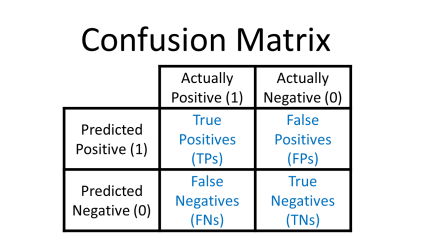

In [51]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[65  3]
 [ 8 24]]


In [53]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.89


# Data Visualization

Here we are trying to visualize the test data predictions. All the circles represents the groud truth(Red indicates the user didn't purchase while Blue indicates that user purchased).We could see a line seperating the entire region into two regions which is nothing but our prediction model. Red region indicates that any user in this region will not buy and Green region indicates that any user in this region will buy the newly launched products. 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


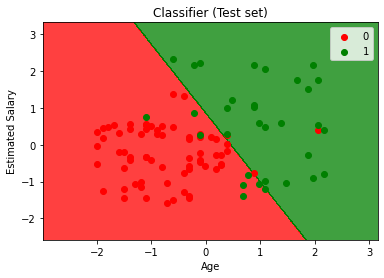

In [56]:
from matplotlib.colors import ListedColormap
X_set, y_set = x_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
							stop = X_set[:, 0].max() + 1, step = 0.01),
					np.arange(start = X_set[:, 1].min() - 1,
							stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(
			np.array([X1.ravel(), X2.ravel()]).T).reshape(
			X1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
	plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
				c = ListedColormap(('red', 'green'))(i), label = j)
	
plt.title('Classifier (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()
